In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy  as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [2]:
def load_mnist_data():
    """
    加载数据
    """
    fashion_mnist = keras.datasets.fashion_mnist
#     (train_images,train_labels),(test_images,test_labels) = 
    return fashion_mnist.load_data()
# load_mnist_data()

In [3]:
# 分类标签
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:

def pre_deal():
    (train_images,train_labels),(test_images,test_labels) = load_mnist_data()
    
#     显示第一张图
    plt.figure()
    plt.imshow(train_images[0])
    plt.colorbar()
    plt.grid(False)
    
#    标准化
    train_images = train_images / 255.0
    test_images = test_images / 255.0
    
#     验证第一张图
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i],cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i]])
    return (train_images,train_labels),(test_images,test_labels)
# pre_deal()

Epoch 1/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.4948 - acc: 0.8263
Epoch 2/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3714 - acc: 0.8660
Epoch 3/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3327 - acc: 0.8791
Epoch 4/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3117 - acc: 0.8858
Epoch 5/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2934 - acc: 0.8918


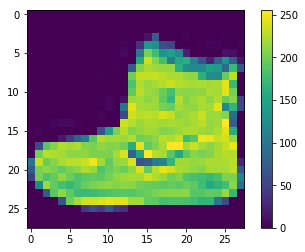

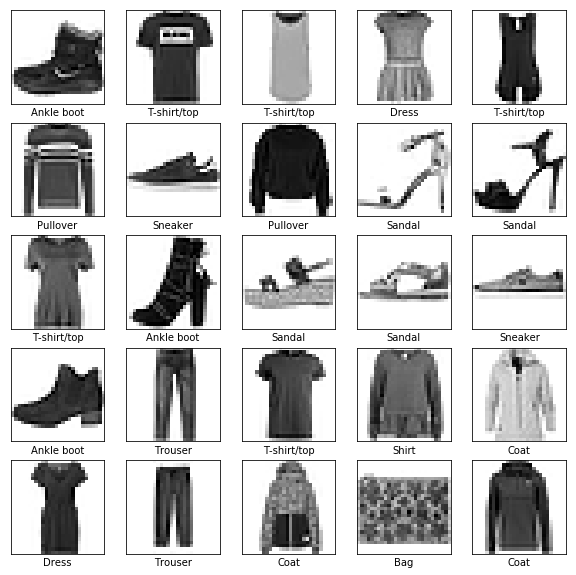

In [8]:
def simple_model():
        model = keras.Sequential([
#             只是改变数组的shape，不改变数据
            keras.layers.Flatten(input_shape=(28,28)),
#             使用relu激活函数
            keras.layers.Dense(128,activation=tf.nn.relu),
#           结果层
            keras.layers.Dense(10,activation=tf.nn.softmax)
        ])
        model.compile(optimizer =tf.train.AdamOptimizer(),
                     loss="sparse_categorical_crossentropy",
                     metrics=['accuracy'])
        (train_images,train_labels),(test_images,test_labels) = pre_deal()
        model.fit(train_images,train_labels,epochs=5)   
        return model
model = simple_model()

In [11]:
(train_images,train_labels),(test_images,test_labels) = load_mnist_data()
test_loss,test_acc = model.evaluate(test_images,test_labels)
print('Test accuracy:', test_acc)


#         对模型做预测
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

10000/10000 [==============================] - 0s 37us/sample - loss: 2.4977 - acc: 0.8427
Test accuracy: 0.8427
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
9
9


In [12]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

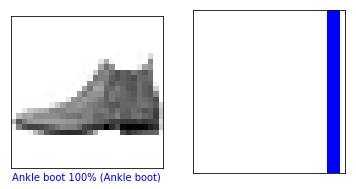

In [13]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

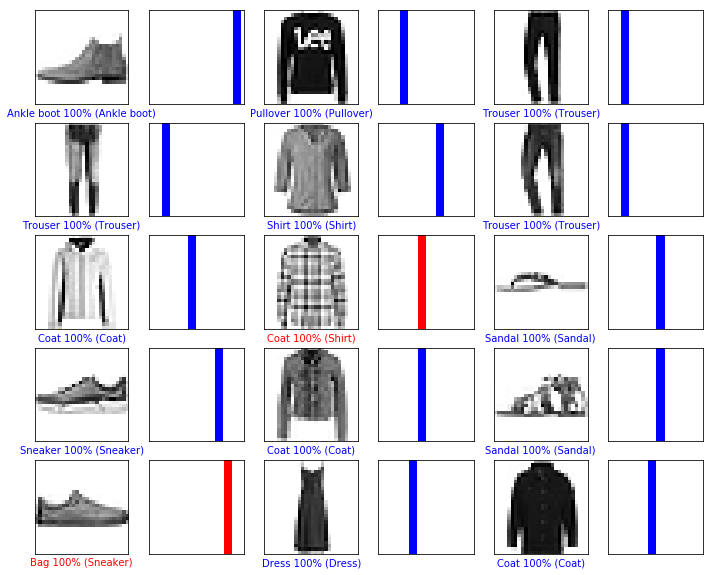

In [14]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)